## Fraudulent Transactions Analysis and Visualization

This notebook performs an analysis of fraudulent transactions to uncover patterns and insights. The analysis is divided into several key questions, each answered through data aggregation and visualization. The dataset used contains information on various transactions, including their financial impact and the circumstances under which they occurred.


### 1. Setup and Data Loading

**Importing Libraries**: Import necessary libraries (`pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`) and configure visualization settings.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
viz_dict = {'grid.linestyle':'--', 'grid.color':'darkgray'}
sns.set_theme('notebook', rc= viz_dict)
sns.set_color_codes(palette= 'deep')
sns.set_style('whitegrid', rc= viz_dict)
import calendar

**Loading Data**: Load the fraudulent transactions dataset from a CSV file and display the first few rows for an initial overview.

In [2]:
file_path = r"datasets/fraudulent_data.csv"
fraudulent_data = pd.read_csv(file_path)
pd.set_option('display.max_columns', 50)
fraudulent_data.drop(columns='index', inplace= True)
fraudulent_data.head()

,year,month,hour,txn_type,txn_status,error_code,remitter_bank,beneficiary_bank,payer_handle,payer_app,payee_handle,payee_app,payee_requested_amount,payee_settlement_amount,difference_amount,payer_state,payee_state,cred_type,cred_subtype,time_of_day
0,2020,2,0,Reversal,Successful,0,Utkarsh Small Finance Bank,Lakshmi Vilas Bank,MAHB,BHIM Maha UPI(Bank of Maharashtra),CITI,CITI Bank (Mobile Banking App),10282,10282,0,Uttar Pradesh,Jammu and Kashmir,Home Loan,Adjustable-Rate Mortgage (ARM),LateNight
1,2020,8,0,Reversal,Successful,0,Allahabad Bank,Canara Bank,RBL,BHIM RBL Pay,APMAHESH,APMAHESH,42022,42022,0,West Bengal,Goa,Auto Loan,New Car Loan,LateNight
2,2020,2,0,Reversal,Successful,0,Utkarsh Small Finance Bank,Lakshmi Vilas Bank,MAHB,BHIM Maha UPI(Bank of Maharashtra),CITI,CITI Bank (Mobile Banking App),10282,10282,0,Uttar Pradesh,Jammu and Kashmir,Home Loan,Adjustable-Rate Mortgage (ARM),LateNight
3,2020,8,0,Reversal,Successful,0,Allahabad Bank,Canara Bank,RBL,BHIM RBL Pay,APMAHESH,APMAHESH,42022,42022,0,West Bengal,Goa,Auto Loan,New Car Loan,LateNight
4,2020,8,0,Reversal,Successful,0,Allahabad Bank,Canara Bank,RBL,BHIM RBL Pay,APMAHESH,APMAHESH,42022,42022,0,West Bengal,Goa,Auto Loan,New Car Loan,LateNight


### 2. Analysis and Visualization

#### Q1. How does the total loss amount (payee settlement amount) vary with (payee) state?
- **Data Aggregation**:
    - Group data by `payee_state` and calculate the total loss amount.
    - Convert the amounts to lakhs for readability.
- **Visualization**:
     - Create a bar plot to show the top 10 states by loss amount.


In [3]:
df1 = fraudulent_data.groupby('payee_state')['payee_settlement_amount'].sum().reset_index()
df1['loss_amount_(in_lakhs)'] = np.round(df1.payee_settlement_amount/1e5, 2)
df1.drop(columns='payee_settlement_amount', inplace= True)
df1.sort_values(by= 'loss_amount_(in_lakhs)', ascending= False, inplace= True)
df1

,payee_state,loss_amount_(in_lakhs)
10,Kerala,184.83
5,Haryana,169.06
13,Odisha,157.91
3,Goa,152.40
1,Bihar,151.39
17,Tamil Nadu,137.24
21,West Bengal,135.43
0,Andhra Pradesh,130.50
16,Rajasthan,119.79
12,Maharashtra,98.95


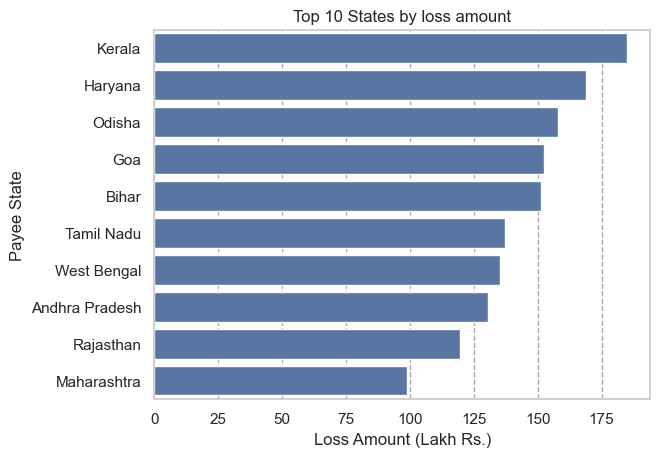

In [4]:
df1 = df1.nlargest(n= 10, columns='loss_amount_(in_lakhs)')

sns.barplot(x= 'loss_amount_(in_lakhs)', y= 'payee_state', data= df1)
plt.xlabel('Loss Amount (Lakh Rs.)')
plt.ylabel('Payee State')
plt.title('Top 10 States by loss amount')
plt.show()

#### Q2. How have fraud incidents fluctuated over the years?
- **Yearly Loss Amount**:
    - Group data by `year` and calculate the total loss amount.
    - Plot a line chart to show the trend over the years.
- **Monthly Loss Amount**:
    - Group data by `month` and calculate the total loss amount.
    - Plot a line chart to show the monthly trend.
- **Yearly Fraud Counts**:
    - Group data by `year` and count the number of fraudulent incidents.
    - Plot a line chart to show the yearly trend.
- **Monthly Fraud Counts**:
    - Group data by `month` and count the number of fraudulent incidents.
    - Plot a line chart to show the monthly trend.


In [5]:
df2 = fraudulent_data.groupby('year')['payee_settlement_amount'].sum().reset_index()
df2['loss_amt_(in_lakhs)'] = np.round(df2['payee_settlement_amount']/1e5, 2)
df2.drop(columns='payee_settlement_amount', inplace= True)
df2.sort_values(by= 'loss_amt_(in_lakhs)', ascending= False)
df2

,year,loss_amt_(in_lakhs)
0,2019,337.27
1,2020,381.28
2,2021,369.55
3,2022,398.56
4,2023,393.94


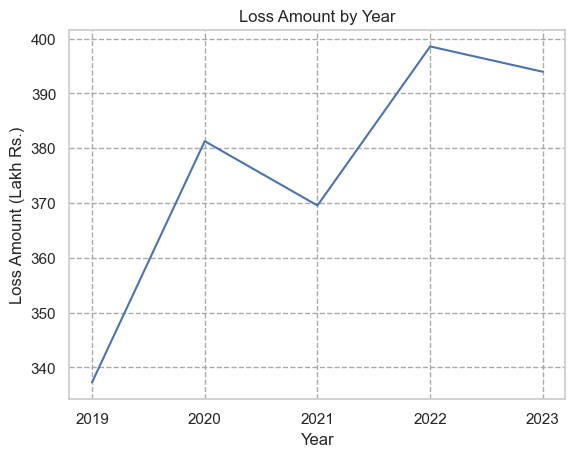

In [6]:
sns.lineplot(x= 'year', y= 'loss_amt_(in_lakhs)', data= df2)
plt.xlabel('Year')
plt.xticks(ticks= df2['year'], labels=[str(i) for i in range(2019, 2024)])
plt.ylabel('Loss Amount (Lakh Rs.)')
plt.title('Loss Amount by Year')
plt.show()

In [7]:
df3 = fraudulent_data.groupby('month')['payee_settlement_amount'].sum().reset_index()
df3['loss_amt_(in_lakhs)'] = np.round(df3['payee_settlement_amount']/1e5, 2)
df3.drop(columns='payee_settlement_amount', inplace= True)
df3.sort_values(by= 'loss_amt_(in_lakhs)', ascending= False)
df3

,month,loss_amt_(in_lakhs)
0,1,137.08
1,2,136.77
2,3,160.69
3,4,159.44
4,5,165.87
5,6,135.32
6,7,170.85
7,8,161.68
8,9,144.60
9,10,162.84


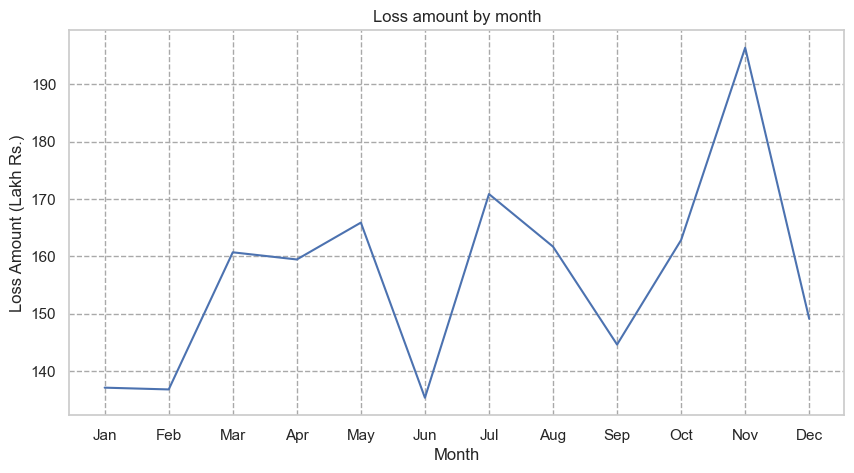

In [8]:
plt.figure(figsize=(10, 5))
sns.lineplot(x= 'month', y= 'loss_amt_(in_lakhs)', data= df3)
plt.xlabel('Month')
plt.xticks(ticks= df3['month'], labels=calendar.month_abbr[1:13])
plt.ylabel('Loss Amount (Lakh Rs.)')
plt.title('Loss amount by month')
plt.show()

In [9]:
df4 = fraudulent_data.groupby('year').size().reset_index(name='fraud_counts')
df5 = fraudulent_data.groupby('month').size().reset_index(name='fraud_counts')

print(df4, "\n", df5)

   year  fraud_counts
0  2019           681
1  2020           750
2  2021           693
3  2022           753
4  2023           708 
     month  fraud_counts
0       1           294
1       2           303
2       3           306
3       4           327
4       5           318
5       6           249
6       7           330
7       8           330
8       9           303
9      10           264
10     11           306
11     12           255


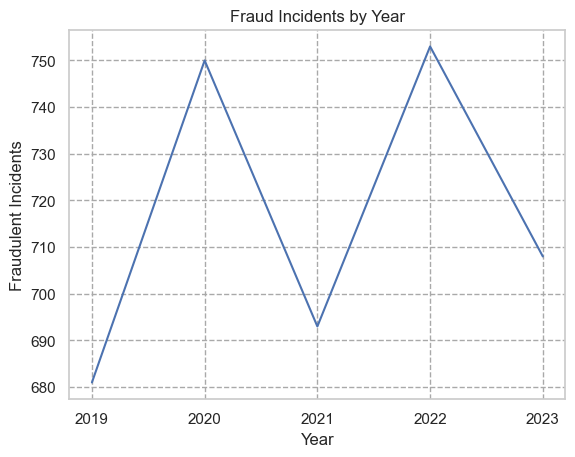

In [10]:
sns.lineplot(x= 'year', y= 'fraud_counts', data= df4)
plt.xlabel('Year')
plt.xticks(ticks=df4['year'], labels=[str(i) for i in range(2019, 2024)])
plt.ylabel('Fraudulent Incidents')
plt.title('Fraud Incidents by Year')
plt.show()

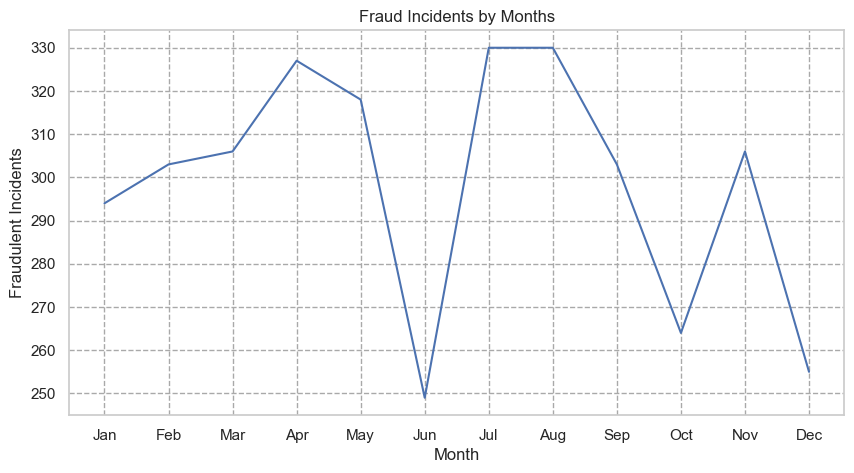

In [11]:
plt.figure(figsize=(10, 5))
sns.lineplot(x= 'month', y= 'fraud_counts', data= df5)
plt.xlabel('Month')
plt.xticks(ticks= df5['month'], labels=calendar.month_abbr[1:13])
plt.ylabel('Fraudulent Incidents')
plt.title('Fraud Incidents by Months')
plt.show()

#### Q3. Which types of Credit fraud are causing the most financial damage?
- **Data Aggregation**:
    - Group data by `cred_type` and calculate the total loss amount.
    - Convert the amounts to lakhs for readability.
- **Visualization**:
    - Create a bar plot to show the loss amount by credit type.


In [12]:
df6 = fraudulent_data.groupby('cred_type')['payee_settlement_amount'].sum().reset_index()
df6['loss_amt_(in_lakhs)'] = np.round(df6.payee_settlement_amount/1e5, 2)
df6.drop(columns= 'payee_settlement_amount', inplace= True)
df6

,cred_type,loss_amt_(in_lakhs)
0,Auto Loan,249.19
1,Credit Card,348.98
2,Debit Card,267.67
3,Home Loan,230.67
4,Line of Credit,228.97
5,Overdraft,275.05
6,Personal Loan,280.06


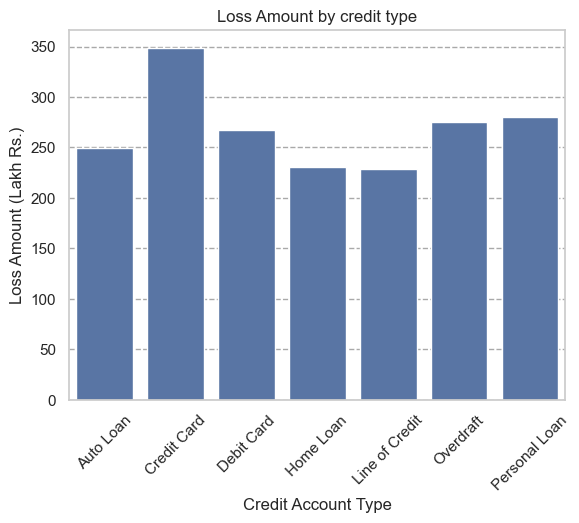

In [13]:
sns.barplot(x= 'cred_type', y= 'loss_amt_(in_lakhs)', data= df6)
plt.xlabel('Credit Account Type')
plt.xticks(rotation= 45)
plt.ylabel('Loss Amount (Lakh Rs.)')
plt.title('Loss Amount by credit type')
plt.show()

#### Q4. How does user behavior vary by time of day in terms of the number of fraudulent transactions and fraudulent transaction amount?
- **Segmentation of Time of Day**:
  - The time of day is segmented based on the hour of the transaction completion time:
    - **LateNight**: 0:00 - 2:59
    - **EarlyMorning**: 3:00 - 5:59
    - **Morning**: 6:00 - 8:59
    - **LateMorning**: 9:00 - 11:59
    - **Afternoon**: 12:00 - 14:59
    - **LateAfternoon**: 15:00 - 17:59
    - **Evening**: 18:00 - 20:59
    - **Night**: 21:00 - 23:59
- **Data Aggregation**:
  - Group data by `time_of_day` and calculate the total loss amount and total difference amount.
  - Convert the amounts to lakhs and sort by custom-defined time segments.
- **Visualization**:
  - Create bar plots to show the loss amount and difference amount by time of day.


In [14]:
segments = ['EarlyMorning', 'Morning', 'LateMorning', 'Afternoon', 'LateAfternoon', 'Evening', 'Night', 'LateNight']
df7 = fraudulent_data.groupby('time_of_day')['payee_settlement_amount'].sum().reset_index()
df7['loss_amt_(in_lakhs)'] = np.round(df7.payee_settlement_amount/1e5, 2)
df7.drop(columns='payee_settlement_amount', inplace= True)
df7['time_of_day'] = pd.Categorical(df7['time_of_day'], categories=segments, ordered=True)
df7.sort_values('time_of_day', inplace= True)
df7

,time_of_day,loss_amt_(in_lakhs)
1,EarlyMorning,171.50
6,Morning,342.23
4,LateMorning,133.67
0,Afternoon,333.16
3,LateAfternoon,179.96
2,Evening,308.09
7,Night,198.92
5,LateNight,213.09


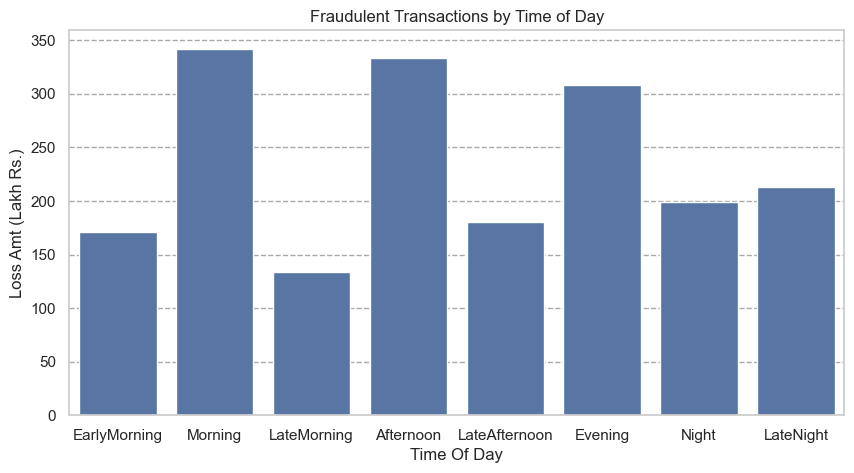

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x= 'time_of_day', y= 'loss_amt_(in_lakhs)', data= df7)
plt.xlabel('Time Of Day')
plt.xticks(ticks=segments, labels= segments)
plt.ylabel('Loss Amt (Lakh Rs.)')
plt.title('Fraudulent Transactions by Time of Day')
plt.show()

In [16]:
segments = ['EarlyMorning', 'Morning', 'LateMorning', 'Afternoon', 'LateAfternoon', 'Evening', 'Night', 'LateNight']
df8 = fraudulent_data.groupby('time_of_day')['difference_amount'].sum().reset_index()
df8['diff_amt_(in_lakhs)'] = np.round(df8['difference_amount'] / 1e5, 2)
df8.drop(columns='difference_amount', inplace=True)
df8['time_of_day'] = pd.Categorical(df8['time_of_day'], categories=segments, ordered=True)
df8.sort_values('time_of_day', inplace=True)
df8

,time_of_day,diff_amt_(in_lakhs)
1,EarlyMorning,-10.86
6,Morning,-20.47
4,LateMorning,-4.40
0,Afternoon,-18.26
3,LateAfternoon,-8.37
2,Evening,-5.72
7,Night,-9.11
5,LateNight,-8.57


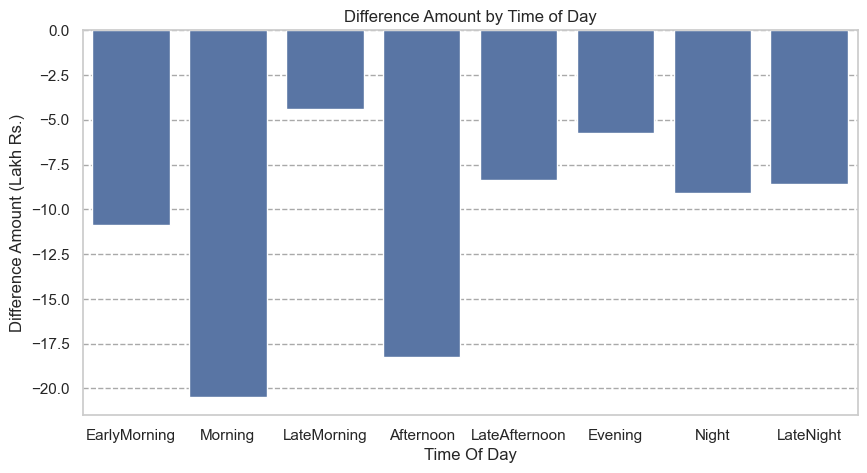

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x='time_of_day', y='diff_amt_(in_lakhs)', data=df8)
plt.xlabel('Time Of Day')
plt.xticks(ticks=segments, labels=segments)
plt.ylabel('Difference Amount (Lakh Rs.)')
plt.title('Difference Amount by Time of Day')
plt.show()

## Conclusion
This notebook provided a comprehensive analysis of fraudulent transactions, focusing on various aspects such as loss amounts by state, yearly and monthly trends in fraudulent incidents, the impact of different credit types, and user behavior based on the time of day.

### Key Insights:

### Loss Amount by State:
- Certain states experience significantly higher financial losses due to fraudulent transactions.
- Kerala tops the list with 184.83 lakhs in losses, indicating a concentration of fraudulent activity in this region.

### Yearly and Monthly Trends:

- *Yearly Loss Amounts*:
    - Total loss amounts fluctuate over the years, reaching a peak of 398.56 lakhs in 2022.
    - This indicates a dynamic landscape of fraudulent activity that organizations need to adapt to.
- *Monthly Loss Amounts*:
    - Monthly trends highlight peaks in March and November, suggesting potential seasonal patterns in fraudulent behavior.
- *Fraudulent Incidents*:
    - Despite variations, the number of fraud incidents remains consistently high, emphasizing the persistent threat posed by fraudulent activities.
- *Credit Type Impact*:
    - Credit card-related fraud accounts for the highest loss amount, with 348.98 lakhs, indicating the significant financial impact of credit card fraud compared to other credit types.

### Time of Day Analysis:

- *Loss Amounts*:
    - Morning and evening periods witness the highest loss amounts, indicating potential peak periods of fraudulent activity.
- *Difference Amounts*:
    - Negative difference amounts during morning and afternoon periods suggest a tendency for overpayments in transactions during these times.
### Next Steps:
- *Deep Dive into High-Risk States*: Further analysis of high-loss states like Kerala could reveal specific factors driving the elevated levels of fraud in these regions.
- *Seasonal and Monthly Patterns*: Investigating peaks in March and November could provide insights into seasonal variations in fraudulent behavior.
- *Credit Type Specific Strategies*: Given the high impact of credit card fraud, implementing targeted prevention measures for credit card transactions could help mitigate financial losses.
- *Behavioral Analysis*: Analyzing user behavior during peak fraudulent periods could uncover patterns that can be used to enhance fraud detection and prevention strategies.
---
This analysis underscores the importance of proactive monitoring and adaptation in combating financial fraud. By understanding the patterns and trends highlighted in this analysis, organizations can better protect themselves against fraudulent activities.

# END OF DOCUMENT